In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#rtdata256 = pd.read_csv('/home/felipe/testresults/sleep256nodes.txt', delimiter = ", ", engine = 'python')
rtdata128 = pd.read_csv('/home/felipe/testresults/sleep128nodes5gen.txt', delimiter = ", ", engine = 'python')
rtdata64 = pd.read_csv('/home/felipe/testresults/sleep64nodes5gen.txt', delimiter = ", ", engine = 'python')
rtdata32 = pd.read_csv('/home/felipe/testresults/sleep32nodes5gen.txt', delimiter = ", ", engine = 'python')
rtdata16 = pd.read_csv('/home/felipe/testresults/sleep16nodes5gen.txt', delimiter = ", ", engine = 'python')
rtdata8 = pd.read_csv('/home/felipe/testresults/sleep8nodes5gen.txt', delimiter = ", ", engine = 'python')
rtdata1 = pd.read_csv('/home/felipe/testresults/sleep1nodes5gen.txt', delimiter = ", ", engine = 'python')

In [3]:
#nodes=np.array([8,16,32,64,128,256])
#y1 = [10,16,32,64,128,256,512]
#y = [8,16,32,64,128,256,400]

nodes=np.array([8,16,32,64,128])
y = [50,64,128,256]
y1 = [25,32,64,128,256]
y2 = [8,16,32,64,100,256]

pop_sizes = rtdata128.loc[rtdata128['Look_ahead']==True]['Pop size'].values

In [4]:
#means256PPP = rtdata256.loc[rtdata256['Look_ahead']==True]['Runtime Expectation'].values
#means256ori = rtdata256.loc[rtdata256['Look_ahead']==False]['Runtime Expectation'].values
means128PPP = rtdata128.loc[rtdata128['Look_ahead']==True]['Runtime Expectation'].values
means128ori = rtdata128.loc[rtdata128['Look_ahead']==False]['Runtime Expectation'].values
means64PPP = rtdata64.loc[rtdata64['Look_ahead']==True]['Runtime Expectation'].values
means64ori = rtdata64.loc[rtdata64['Look_ahead']==False]['Runtime Expectation'].values
means32PPP = rtdata32.loc[rtdata32['Look_ahead']==True]['Runtime Expectation'].values
means32ori = rtdata32.loc[rtdata32['Look_ahead']==False]['Runtime Expectation'].values
means16PPP = rtdata16.loc[rtdata16['Look_ahead']==True]['Runtime Expectation'].values
means16ori = rtdata16.loc[rtdata16['Look_ahead']==False]['Runtime Expectation'].values
means8PPP = rtdata8.loc[rtdata8['Look_ahead']==True]['Runtime Expectation'].values
means8ori = rtdata8.loc[rtdata8['Look_ahead']==False]['Runtime Expectation'].values

In [5]:
PPParray=np.zeros((len(nodes),len(pop_sizes)))
ORIarray=np.zeros((len(nodes),len(pop_sizes)))


#PPParray[5,:]=means256PPP
PPParray[4,:]=means128PPP
PPParray[3,:]=means64PPP
PPParray[2,:]=means32PPP
PPParray[1,:]=means16PPP
PPParray[0,:]=means8PPP

print(means128ori)


#ORIarray[5,:]=means256ori
ORIarray[4,:]=means128ori
ORIarray[3,:]=means64ori
ORIarray[2,:]=means32ori
ORIarray[1,:]=means16ori
ORIarray[0,:]=means8ori



[37.98183131 37.50024273 40.8217346  58.36338799]


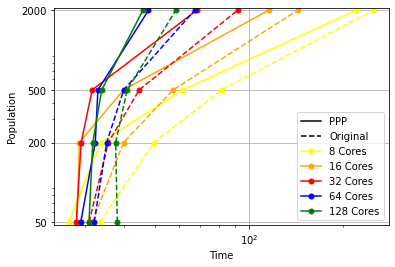

In [14]:
colors=["yellow", "orange" ,"red", "blue", "green", "purple"]


plt.plot([0],[10], label="PPP", color = "black")

plt.plot([0],[10], label="Original", color = "black", linestyle = "dashed")

#plt.plot(PPParray[0,:],pop_sizes,label=str(nodes[0])+" Cores", marker="o", markersize=5, color=colors[0])

for i in range(0,len(nodes)):
    plt.plot(PPParray[i,:],pop_sizes,label=str(nodes[i])+" Cores", marker="o", markersize=5, color=colors[i])
    plt.plot(ORIarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dashed")
    
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.ylabel("Population")
plt.yticks(pop_sizes,pop_sizes)
plt.xscale('log')
plt.xlabel("Time")
plt.ylim(0.95*pop_sizes[0],1.05*pop_sizes[-1])
plt.savefig("/home/felipe/MTGraphics/Cores_PopRuntime.jpg")
plt.show()

In [7]:
print(PPParray)

[[ 26.59306836  33.61621876  61.55116123 219.95070332]
 [ 28.18138233  28.71716493  39.77099984 115.59387875]
 [ 28.07582043  29.1016313   31.5597574   68.0976899 ]
 [ 29.01537278  32.28378251  32.9152848   47.74501655]
 [ 30.82855758  31.69319649  33.85842587  45.8320307 ]]


In [8]:
pop_sizes_1=pop_sizes[0:-1]

means1PPP = rtdata1.loc[rtdata1['Look_ahead']==True]['Runtime Expectation'].values
means1PPP = np.append(means1PPP, 4*means1PPP[-1])

par_efficiency=np.zeros((len(nodes),len(pop_sizes)))

for i in range(0,len(nodes)):
    for j in range(0,len(pop_sizes)):
        par_efficiency[i,j]=means1PPP[j]/(PPParray[i,j]*nodes[i])

print(par_efficiency)

par_efficiency_ori=np.zeros((len(nodes),len(pop_sizes)))

for i in range(0,len(nodes)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_ori[i,j]=means1PPP[j]/(ORIarray[i,j]*nodes[i])

print(par_efficiency_ori)

[[0.40234053 0.66122711 0.89681046 1.00385631]
 [0.18983223 0.38701514 0.69396955 0.95506312]
 [0.09527299 0.19095111 0.43726354 0.81059615]
 [0.04609397 0.08606471 0.20962801 0.57806793]
 [0.02169147 0.04383424 0.10189437 0.30109797]]
[[0.3199039  0.44720707 0.67481584 0.88352978]
 [0.16944598 0.27952557 0.48189347 0.77124177]
 [0.08670022 0.15630308 0.30927504 0.60006648]
 [0.0417456  0.07914225 0.17330111 0.41160419]
 [0.01760623 0.03704635 0.08451338 0.23644843]]


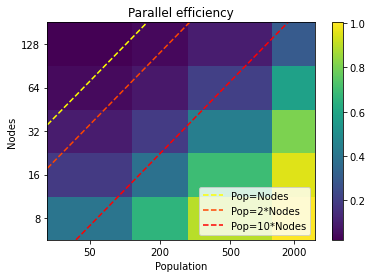

In [9]:
kekse=np.zeros((len(nodes)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodes,2*nodes[-1]),  kekse)
fig.colorbar(im)

plt.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodes,nodes)
ax.axis('tight')
plt.title('Parallel efficiency')
plt.savefig("/home/felipe/MTGraphics/PPPParallelEff.jpg")
plt.show()

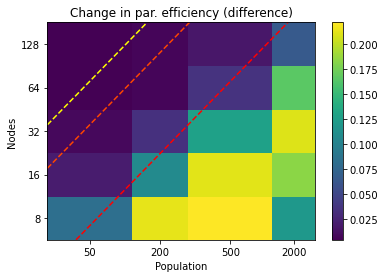

In [10]:
diff = np.zeros((len(nodes)+1,len(pop_sizes)+1))
diff[:-1,:-1] = par_efficiency-par_efficiency_ori
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodes,2*nodes[-1]),  diff)
fig.colorbar(im)
plt.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodes,nodes)
plt.title('Change in par. efficiency (difference)')
plt.savefig("/home/felipe/MTGraphics/ChangeinParEff.jpg")
plt.show()

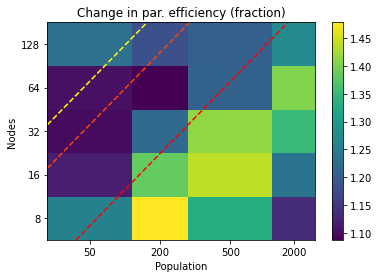

In [11]:
frac = np.zeros((len(nodes)+1,len(pop_sizes)+1))
frac[:-1,:-1] = par_efficiency/par_efficiency_ori
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodes,2*nodes[-1]),  frac)
fig.colorbar(im)
plt.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Workers")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Workers")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Workers")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodes,nodes)
plt.title('Change in par. efficiency (fraction)')
plt.savefig("/home/felipe/MTGraphics/ChangeinParEffFrac.jpg")
plt.show()

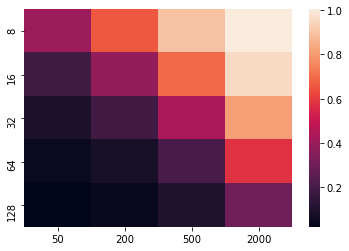

In [12]:
import seaborn

seaborn.heatmap(par_efficiency, xticklabels=pop_sizes, yticklabels=nodes)